[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# SVM Rand classification

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 03/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0029LinearClassifierSVM.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.svm import SVC

# Image Processing

# Machine Learning


# Miscellaneous
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, List, Tuple

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# from bokeh.plotting import figure, show

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import Plot2DLinearClassifier, PlotBinaryClassData

In [5]:
# General Auxiliary Functions



In [6]:
# Parameters

# Data Generation
numSamples0 = 250
numSamples1 = 250

# Data Visualization
numGridPts = 250

## Generate / Load Data


In [7]:
# Generate Data 
numSamples = numSamples0 + numSamples1
mX = np.random.rand(numSamples, 2) - 0.5
mX[numSamples0:, 0] += 2
vY = np.ones((numSamples, ), dtype = np.integer)
vY[:numSamples0] = 0

# One hard sample
mX[0, 0]    = 0.75
vY[0]       = 1

vAxis = np.array([-1, 3, -1, 1])

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')

The features data shape: (500, 2)
The labels data shape: (500,)


### Plot the Data

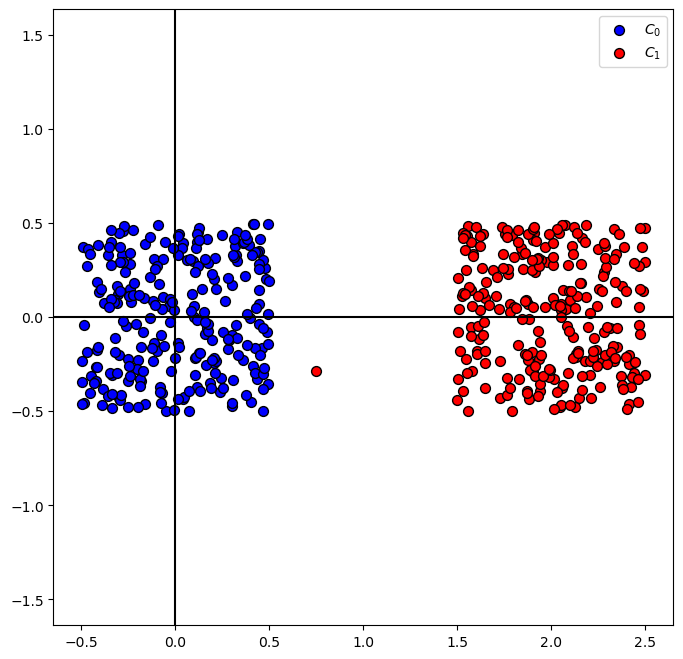

In [8]:
# Plot the Data
hA = PlotBinaryClassData(mX, vY)

## Train a SVM Classifier

### The SciKit Learn Package

In the course, from now on, we'll mostly use modules and functions from the [SciKit Learn](https://scikit-learn.org) package.  
It is mostly known for its API of `<model>.fit()` and `<model>.predict()`.  
This simple choice of convention created the ability to scale in the form of pipelines, chaining models for a greater model.

In [9]:
# Plotting Function

def PlotSVM( C: float ) -> None:
    if C == 0:
        C = 1e-20

    # Train the linear SVM
    oSvmClassifier = SVC(C = C, kernel = 'linear')
    oSvmClassifier = oSvmClassifier.fit(mX, vY)
    
    # Get model params
    vW =  oSvmClassifier.coef_[0]
    b  = -oSvmClassifier.intercept_  

    axisTitle = f'SVM Classifier: $C = {C}$'
    
    hF, hA = plt.subplots(figsize = (8, 8))
    PlotBinaryClassData(mX, vY, hA = hA, axisTitle = axisTitle)

    vXlim = vAxis[:2]
    
    hA.plot(vXlim, (b + 1 - vW[0] * vXlim) / vW[1], lw = 2, color = 'orange', ls = '--')
    hA.plot(vXlim, (b + 0 - vW[0] * vXlim) / vW[1], lw = 4, color = 'orange', ls = '-' )
    hA.plot(vXlim, (b - 1 - vW[0] * vXlim) / vW[1], lw = 2, color = 'orange', ls = '--')

    hA.axis(vAxis)

$$ \min_{\boldsymbol{w},b}\frac{1}{2} {\left\| \boldsymbol{w} \right\|}^{2} + C \sum_{i} {\xi}_{i} $$

$$ \xi_{i} := \max \left\{ 0, 1 - {y}_{i} \left( \boldsymbol{w}^{T} \boldsymbol{x}_{i} - b \right) \right\} $$

In [10]:
# Display the Geometry of the Classifier

cSlider = FloatSlider(min = 0, max = 100, step = 1, value = 1, layout = Layout(width = '30%'))
interact(PlotSVM, C = cSlider)

plt.show()

interactive(children=(FloatSlider(value=1.0, description='C', layout=Layout(width='30%'), step=1.0), Output())…

* <font color='red'>(**?**)</font> How should `C` changed with the number of samples?